In [5]:
from __future__ import division
from sklearn.model_selection import train_test_split

from random_forest import RandomForest
from gui import Gui
import config
import helpers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import copy
import altair as alt
#import statsmodels.api as sm
import sklearn
from sklearn.linear_model import LogisticRegression


from reducer import Reducer

In [6]:
red_ruleset = []
new_ruleset = []

feature_names = config.feature_names

In [7]:
groundTruth = helpers.create_separate_files_status("data.csv")

In [8]:
x_train, x_test, y_train, y_test = train_test_split(helpers.create_dataframe("dataWoName.csv"), groundTruth, test_size=0.33,
                                                        random_state=42)

In [12]:
log_res = LogisticRegression(solver = 'saga')
log_res.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

In [13]:
log_res.intercept_

array([0.00341324])

In [14]:
log_res.coef_

array([[ 1.35228815e-02, -1.09826527e-03, -1.20926654e-02,
         7.09394890e-05,  5.75885895e-07,  4.09226004e-05,
         4.15938942e-05,  1.22779111e-04,  3.32524685e-04,
         3.31086320e-03,  1.71468313e-04,  2.05862829e-04,
         2.85993722e-04,  5.14402501e-04,  3.87500215e-04,
         2.18551352e-02,  2.44532556e-03,  2.98973637e-03,
        -1.31568235e-03,  1.80545866e-03,  1.26902386e-02,
         2.19125194e-03]])

In [15]:
log_res.score(x_test, y_test)

0.7384615384615385

In [85]:
def perform_several_logistic_regressions(nr_iterations):
    res = []
    for i in range(nr_iterations):
        x_train, x_test, y_train, y_test = train_test_split(helpers.create_dataframe("dataWoName.csv"), groundTruth, test_size=0.33,
                                                        random_state=i)
        log_res = LogisticRegression(penalty='l1', solver = 'saga')
        log_res.fit(x_train, y_train)
        score = log_res.score(x_test, y_test)
        res.append(score)
        
    return res

In [86]:
scores = perform_several_logistic_regressions(100)

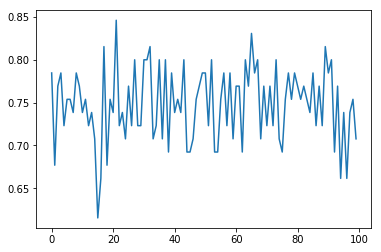

In [87]:
plt.plot(scores)

In [88]:
np.mean(scores)

0.7481538461538462

In [89]:
np.std(scores)

0.042671443273059294

In [22]:
from sklearn import svm

In [23]:
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(x_train, y_train)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(x_train, y_train)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(x_train, y_train)
lin_svc = svm.LinearSVC(C=C).fit(x_train, y_train)

/home/tamara/anaconda3/envs/cdss_python2/lib/python2.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/tamara/anaconda3/envs/cdss_python2/lib/python2.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [26]:
svc.score(x_test, y_test)

0.8461538461538461

In [27]:
rbf_svc.score(x_test, y_test)

0.7384615384615385

In [28]:
poly_svc.score(x_test, y_test)

0.8153846153846154

In [29]:
lin_svc.score(x_test, y_test)

0.26153846153846155

In [30]:
C = 0.1  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(x_train, y_train)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(x_train, y_train)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(x_train, y_train)
lin_svc = svm.LinearSVC(C=C).fit(x_train, y_train)

In [31]:
print(svc.score(x_test, y_test))
print(rbf_svc.score(x_test, y_test))
print(poly_svc.score(x_test, y_test))
print(lin_svc.score(x_test, y_test))

0.8461538461538461
0.7384615384615385
0.8153846153846154
0.7230769230769231


In [34]:
def perform_several_svm(nr_iterations):
    df = pd.DataFrame(columns=["svm", "score"])
    C = 0.1
    for i in range(nr_iterations):
        x_train, x_test, y_train, y_test = train_test_split(helpers.create_dataframe("dataWoName.csv"), groundTruth, test_size=0.33,
                                                        random_state=i)
        svc = svm.SVC(kernel='linear', C=C).fit(x_train, y_train)
        rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(x_train, y_train)
        poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(x_train, y_train)
        lin_svc = svm.LinearSVC(C=C).fit(x_train, y_train)
        
        new_row = {'svm':'svc', 'score':svc.score(x_test, y_test)}
        df = df.append(new_row, ignore_index=True)
        
        new_row = {'svm':'rbf_svc', 'score':rbf_svc.score(x_test, y_test)}
        df = df.append(new_row, ignore_index=True)
        
        new_row = {'svm':'poly_svc', 'score':poly_svc.score(x_test, y_test)}
        df = df.append(new_row, ignore_index=True)

        new_row = {'svm':'lin_svc', 'score':lin_svc.score(x_test, y_test)}
        df = df.append(new_row, ignore_index=True)

    return df

In [44]:
df_svms = perform_several_svm(100)
df_svms.to_csv("/home/tamara/Documents/PECLIDES/df_svms.csv")

KeyboardInterrupt: 

In [45]:
mean_svc = np.mean(df_svms[df_svms.svm == "svc"].score)
mean_rbf_svc = np.mean(df_svms[df_svms.svm == "rbf_svc"].score)
mean_poly_svc = np.mean(df_svms[df_svms.svm == "poly_svc"].score)
mean_lin_svc = np.mean(df_svms[df_svms.svm == "lin_svc"].score)

std_svc = np.std(df_svms[df_svms.svm == "svc"].score)
std_rbf_svc = np.std(df_svms[df_svms.svm == "rbf_svc"].score)
std_poly_svc = np.std(df_svms[df_svms.svm == "poly_svc"].score)
std_lin_svc = np.std(df_svms[df_svms.svm == "lin_svc"].score)


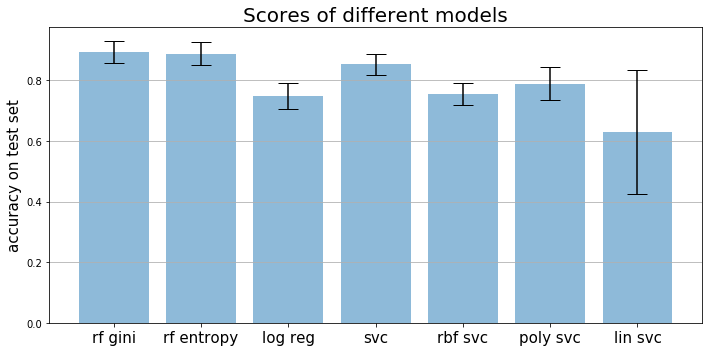

In [91]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar([0,1,2,3,4,5,6], [mean_gini, mean_entropy, np.mean(scores), mean_svc, mean_rbf_svc, mean_poly_svc, mean_lin_svc], yerr=[std_gini, std_entropy, np.std(scores), std_svc, std_rbf_svc, std_poly_svc, std_lin_svc], align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('accuracy on test set', fontsize=15)
ax.set_xticks([0,1,2,3,4,5,6])
ax.set_xticklabels(["rf gini", "rf entropy", "log reg", "svc", "rbf svc", "poly svc", "lin svc"], fontsize=15)
ax.set_title('Scores of different models', fontsize=20)
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig("/home/tamara/Documents/PECLIDES/pics/scores_different_models_100_1.svg")
plt.show()

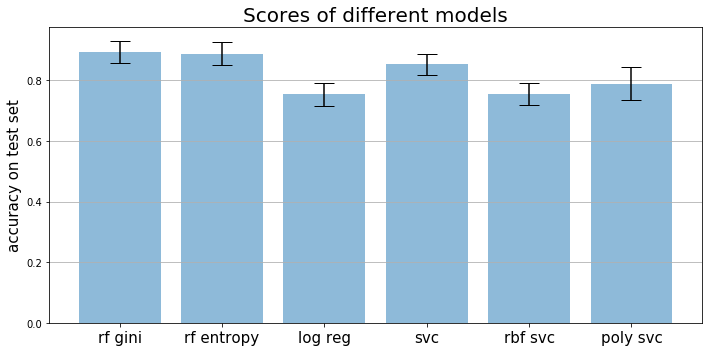

In [84]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar([0,1,2,3,4,5], [mean_gini, mean_entropy, np.mean(scores), mean_svc, mean_rbf_svc, mean_poly_svc], yerr=[std_gini, std_entropy, np.std(scores), std_svc, std_rbf_svc, std_poly_svc], align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('accuracy on test set', fontsize=15)
ax.set_xticks([0,1,2,3,4,5])
ax.set_xticklabels(["rf gini", "rf entropy", "log reg", "svc", "rbf svc", "poly svc", "lin svc"], fontsize=15)
ax.set_title('Scores of different models', fontsize=20)
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig("/home/tamara/Documents/PECLIDES/pics/scores_different_models_100_3.svg")
plt.show()

In [47]:
df_svms.to_csv("/home/tamara/Documents/PECLIDES/df_svms.csv")

In [54]:
red_ruleset = []
new_ruleset = []

feature_names = config.feature_names

In [55]:
groundTruth = helpers.create_separate_files_status("data.csv")

In [56]:
x_train, x_test, y_train, y_test = train_test_split(helpers.create_dataframe("dataWoName.csv"), groundTruth, test_size=0.33, random_state=42)

In [57]:
def test_rf_criterions(nr_iterations):
    df = pd.DataFrame(columns=["criterion", "score"])
    for i in range(nr_iterations):
        x_train, x_test, y_train, y_test = train_test_split(helpers.create_dataframe("dataWoName.csv"), groundTruth, test_size=0.33,
                                                        random_state=i)
        rf = RandomForest(x_test, y_test, x_train, y_train, "entropy")
        score = rf.score
        
        new_row = {'criterion':'entropy', 'score':score}
        df = df.append(new_row, ignore_index=True)
        
        x_train, x_test, y_train, y_test = train_test_split(helpers.create_dataframe("dataWoName.csv"), groundTruth, test_size=0.33,
                                                        random_state=i)
        rf = RandomForest(x_test, y_test, x_train, y_train, "gini")
        score = rf.score
        
        new_row = {'criterion':'gini', 'score':score}
        df = df.append(new_row, ignore_index=True)

        
    return df

In [59]:
df_random_forests = test_rf_criterions(100)

In [62]:
mean_gini = np.mean(df_random_forests[df_random_forests.criterion == "gini"].score)
mean_entropy = np.mean(df_random_forests[df_random_forests.criterion == "entropy"].score)
std_gini = np.std(df_random_forests[df_random_forests.criterion == "gini"].score)
std_entropy = np.std(df_random_forests[df_random_forests.criterion == "entropy"].score)